In [2]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------ --------------- 5.0/8.1 MB 27.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 26.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 22.1 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- -------------

   StudentId    Name  MathScore  ScienceScore  EnglishScore  Attendance
0          1    John       85.0          78.0            80          95
1          2    Emma       90.0          82.0            85          88
2          3  Sophia        NaN          88.0            87          92
3          4    Mike       70.0           NaN            60          65
4          5   Chris      120.0          75.0            90         102
 
Missing Values:
 StudentId       0
Name            0
MathScore       1
ScienceScore    1
EnglishScore    0
Attendance      0
dtype: int64
 
   StudentId    Name  MathScore  ScienceScore  EnglishScore  Attendance
0          1    John      85.00         78.00            80          95
1          2    Emma      90.00         82.00            85          88
2          3  Sophia      91.25         88.00            87          92
3          4    Mike      70.00         80.75            60          65
4          5   Chris     120.00         75.00            90       

C:\Users\Paras\AppData\Local\Temp\ipykernel_6196\3370734221.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MathScore'].fillna(df['MathScore'].mean(),inplace=True)
C:\Users\Paras\AppData\Local\Temp\ipykernel_6196\3370734221.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

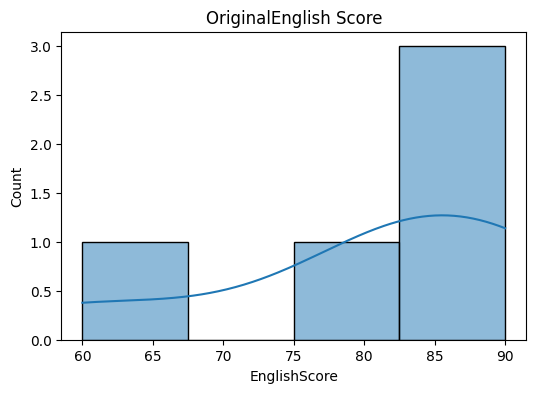

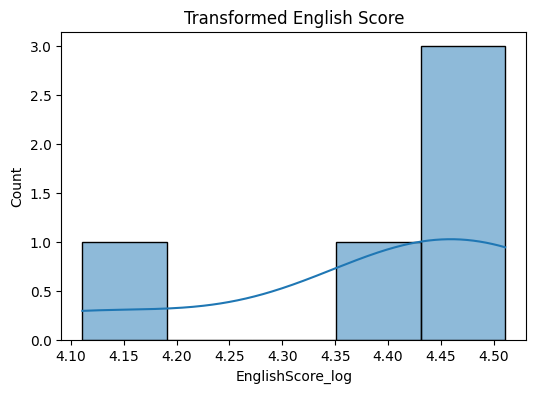

In [1]:
# 2nd practical

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'StudentId' : [1 , 2 , 3 , 4 , 5],
    'Name' : ['John','Emma','Sophia','Mike','Chris'],
    'MathScore': [85, 90, np.nan, 70, 120],
    'ScienceScore': [78, 82, 88, np.nan, 75],
    'EnglishScore': [80, 85, 87, 60, 90],
    'Attendance': [95, 88, 92, 65, 102]
}

df = pd.DataFrame(data)

print(df)

print(" ")
print('Missing Values:\n',df.isnull().sum())

df['MathScore'].fillna(df['MathScore'].mean(),inplace=True)
df['ScienceScore'].fillna(df['ScienceScore'].mean(),inplace=True)

print(" ")
print(df)

print(" ")

# outlier

def detect_outlier(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    return df[((df[column]<lowerbound)) | ((df[column]>upperbound))]

print("Outlier:\n")
out = detect_outlier('MathScore')
print(out)
print(" ")
df['MathScore'] = np.where(df['MathScore']>100,100,df['MathScore'])
df['Attendance'] = np.where(df['Attendance']>100,100,df['Attendance'])

print(df)
print(" ")

plt.figure(figsize=(6,4))
sns.histplot(df['EnglishScore'],kde=True)
plt.title('OriginalEnglish Score')
plt.show()

df['EnglishScore_log'] = np.log1p(df['EnglishScore'])

plt.figure(figsize=(6,4))
sns.histplot(df['EnglishScore_log'],kde=True)
plt.title('Transformed English Score')
plt.show()